# Logistic Regression as a Single Neuran of a Neural Network

Welcome to your first programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset where logistic regression represents a single nueron. 

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 -  Loading Packages ##
First, let's run the cell below to import all the packages that you will need during this assignment. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split

%matplotlib inline

## 2 - Utility functions to convert images into datasets ##
The following functions are used to convert the cats and dogs images in the dataset folder into the numpy array format with labels. 

In [2]:
def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized).T
    return image_array

In [3]:
def create_train_test_data(num_pix,test_size=0.2):
    cat_files = glob.glob("datasets/cat*")
    dog_files = glob.glob("datasets/dog*")

    # Restrict cat and dog files here for testing
    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

    y_cat = np.zeros(len(cat_list))
    y_dog = np.ones(len(dog_list))

    X = np.concatenate([cat_list, dog_list])
    X = np.concatenate([cat_list, dog_list])
    y = np.concatenate([y_cat, y_dog])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test

### 2.1 - Load data set ###
Use the utility functions provided above to load the train_set_x,train_set_y, test_set_x, test_set_y.
Set the `num_pix` to 64 and keep the `test_size` as the default value.

In [4]:
# set the num_pix to 64
 # num_pix = None

num_pix = 64

# load the train_set_x_orig, test_set_x_orig, train_set_y, test_set_y

train_set_x, test_set_x, train_set_y, test_set_y = create_train_test_data(num_pix,test_size = 0.2)


#### 2.1.1 - Print the shapes ###
Print the shape of the following variables
- Number of training examples: m_train
- Number of testing examples: m_test
- Height/Width of each image: num_px
- train_set_x shape
- train_set_y shape
- test_set_x shape
- test_set_y shape

In [5]:
# your code here <begin>

#Number of Training Examples:

m_train = np.shape(train_set_x)[0]
print("Number of training examples:")
print(m_train)

#Number of Testing Exampes:
print("\nNumber of test examples:")
m_test = np.shape(test_set_x)[0]
print(m_test)

#Height/Width of each image
print("\nHeight/Width of Each Image is :")
print(num_pix)

#Shape of train_set_x

print("\ntrain_set_x shape:")
print(np.shape(train_set_x))

#Shape of train_set_y

print("\ntrain_set_y shape:")
print(np.shape(train_set_y))

#Shape of test_set_x

print("\ntest_set_x shape: ")
print(np.shape(test_set_x))

#Shape of test_set_y

print("\ntest_set_y shape:")
print(np.shape(test_set_y))

#your code here <end>

Number of training examples:
640

Number of test examples:
160

Height/Width of Each Image is :
64

train_set_x shape:
(640, 3, 64, 64)

train_set_y shape:
(640,)

test_set_x shape: 
(160, 3, 64, 64)

test_set_y shape:
(160,)


In [6]:
# print(train_set_y)
# print(np.shape(train_set_y))

#### 2.1.2 - Fixing ill-shape vectors ####
It is possible that the train_set_y and test_set_y have an ill-shape. Fix these shapes so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)

In [7]:
# your code here <begin>                -------------need to verify this bit
train_set_y = np.reshape(train_set_y, (1,640))
test_set_y = np.reshape(test_set_y, (1,160))
# your code here <end>

print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_y shape: (1, 640)
test_set_y shape: (1, 160)


In [8]:
# print(train_set_y)
# print(np.shape(train_set_y))
# type(train_set_y)

### 2.2 - Flatten the data
Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3, 1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [9]:
# train_set_x

In [10]:
# your code here
train_set_x_flatten = train_set_x.flatten().reshape(640,64*64*3).transpose()
test_set_x_flatten = test_set_x.flatten().reshape(160,64*64*3).transpose()


print("Before Flattening\n")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("test_set_x shape: " + str(test_set_x.shape))


print("\nAfter Flattening\n")
print ("train_set_x shape: " + str(train_set_x_flatten.shape))
print ("test_set_x shape: " + str(test_set_x_flatten.shape))


Before Flattening

train_set_x shape: (640, 3, 64, 64)
test_set_x shape: (160, 3, 64, 64)

After Flattening

train_set_x shape: (12288, 640)
test_set_x shape: (12288, 160)


### 2.3 - Standardize the data
Divide every row of the dataset by 255 

In [11]:
# your code here

# print(train_set_x_flatten)

train_set_x_flatten_std = train_set_x_flatten/255
# print(train_set_x_flatten_std)
# print(np.shape(train_set_x_flatten_std))

test_set_x_flatten_std = test_set_x_flatten/255
# print(test_set_x_flatten_std)
# print(np.shape(test_set_x_flatten_std))

## 3 - Implementing the Helper Functions ## 

### 3.1 - Sigmoid function
Implement `sigmoid()`. 

In [12]:
# your code here
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#test
#sigmoid(0.345)

### 3.2 - Implement initialize_with_zeros
Write a function that initializes initialize w as a vector of zeros and set `b` to zero. 

In [13]:
# your code here

#Dimension of the Training Data
# print(np.shape(train_set_x_flatten_std))

def initialize_weights():
    w = np.zeros((12288,1))
    b = 0
    #b = np.zeros((1,640))
    return w,b


### 3.3 - Forward propagation

Implement forward propagation to calculate $A$ and cost.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


In [14]:
# your code here

#Forward Propagation 
def forward_pass(X, Y, w, b):
    
    m = np.shape(X)[1]
    
    Z = np.dot(w.transpose(),X) + b
    A = sigmoid(Z)
    # np.shape(A)
    # np.shape(Z)

    J = Y*np.log(A) + (1-Y)*np.log(1-A)
    J = -np.sum(J)/m
    return A, J

### 3.4 - Backward propagation

Implement backward propagation to compute gradients $dw$ and $db$
Here are the two formulas you will be using: 

$$ dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [15]:
# your code here
def backprop(X, Y, A):
    # X is train_set_x_flatten_std
    # Y is train_set_y
    # A is returned from forward_pass (the output activations)
    # m is number of training examples
    
    m = np.shape(X)[1]

    dZ = A - Y

    dw = (1/m)*(np.matmul(X,dZ.transpose()))

    db = (1/m)*np.sum(dZ)
    
    return dw,db

### 3.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. 

In [16]:
# your code here

def optimize(alpha,w,b,dw,db):
    #alpha - learning rate
    #w - current weight
    #b- current bias
    #dw - weight change to be made
    #db - bias change to be made
    
    w = w - alpha*dw
    b = b - alpha*db

    return w,b

### 3.6 - Prediction

Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [17]:
# your code here
def predict(X, w, b):
    y_hat = sigmoid(np.dot(w.transpose(),X) + b)
    
    #Thresholding into 0 and 1 --- binary classification prediction
    for c, i in enumerate(y_hat[0]):
        if i > 0.5:
            y_hat[0][c] = 1
        else:
            y_hat[0][c] = 0
            
    return y_hat

## 4 - Regression Model ##
Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [18]:
# your code here


#Regression Model 
def model(num_iter, alpha, X_train, Y_train, X_test, Y_test):
    
    #Initialize the weights/bias ---w is the weight vector, b is the bias value
    w,b = initialize_weights()
    
    #Number of Training Examples:
    m = np.shape(X_train)[1]
    
    #Cost Function with respect to number of iterations
    #Store that Data
    
    Cost_Data = []
    Weight_Gradient = []
    Bias_Gradient = []
    
    for i in range(0,num_iter):
            
        #Run the forward pass----  A is the activations, J is the cost
        A,J = forward_pass(X_train, Y_train, w,b)
        
        Cost_Data.append(J)
        
        if i%100 == 0:
            print('Iteration {} Cost {}'.format(i, J))
            
            

        #Error Backpropagation --- dw is the weight change, db is the bias change
        dw,db = backprop(X_train, Y_train, A)

        Weight_Gradient.append(dw)
        Bias_Gradient.append(db)
        
        #Optimize --- w,b are the new weights, bias values
        w,b = optimize(alpha,w,b,dw,db) 
       
    
    
    
    # For train and test accuracy
    Y_prediction = predict(X_test, w, b)
    
    Y_prediction_train = predict(X_train, w, b)
    
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - Y_test)) * 100))
        
    
    return Cost_Data, w,b, Weight_Gradient,Bias_Gradient

    

## 5. Run the regression model function to train your model.
### 5.1 - Setting parameters (part 1)
Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

In [19]:
# your code here

Cost_Data,w ,b,Weight_Gradient,Bias_Gradient = model(5000,0.0005,train_set_x_flatten_std,train_set_y,test_set_x_flatten,test_set_y)

# model(5000,0.0005,train_set_x_flatten_std,train_set_y,test_set_x_flatten,test_set_y)

Iteration 0 Cost 0.6931471805599453
Iteration 100 Cost 0.6528032336104109
Iteration 200 Cost 0.6426024880879245
Iteration 300 Cost 0.6337974224943872
Iteration 400 Cost 0.625975040303305
Iteration 500 Cost 0.6188924280284445
Iteration 600 Cost 0.612392730989925
Iteration 700 Cost 0.6063678659145728
Iteration 800 Cost 0.6007395718947468
Iteration 900 Cost 0.595448884326657
Iteration 1000 Cost 0.590449923015139
Iteration 1100 Cost 0.5857060500634999
Iteration 1200 Cost 0.5811873936375455
Iteration 1300 Cost 0.5768691898102178
Iteration 1400 Cost 0.5727306318184503
Iteration 1500 Cost 0.5687540448963416
Iteration 1600 Cost 0.5649242770795645
Iteration 1700 Cost 0.5612282379502809
Iteration 1800 Cost 0.5576545418234646
Iteration 1900 Cost 0.5541932267194426
Iteration 2000 Cost 0.5508355296858496
Iteration 2100 Cost 0.547573704912298
Iteration 2200 Cost 0.5444008749348115
Iteration 2300 Cost 0.5413109078213869
Iteration 2400 Cost 0.5382983150222459
Iteration 2500 Cost 0.5353581658367924
Ite

**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 91.25 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 60.0 % </td>
    </tr>
</table> 




Let's also plot the cost function and the gradients.

Text(0.5, 1.0, 'Cost vs No. of Iterations')

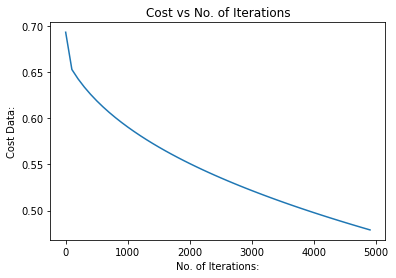

In [20]:
# Plot learning curve (with costs) for part 1

# Plot learning curve (with costs) for part 2
x_axis = [i for i in range(0,5000) if i%100 ==0]
y_axis = [Cost_Data[i] for i in range(0, 5000) if i%100 ==0]
plt.plot(x_axis, y_axis)
plt.xlabel('No. of Iterations:')
plt.ylabel('Cost Data:')
plt.title('Cost vs No. of Iterations')

### 5.1 - Setting parameters (part 2)
Set the `num_iterations` to 2000 and `learning_rate` to 0.005 and run the model again. Plot the cost function.

In [21]:
# your code here

Cost_Data1,w1 ,b1,Weight_Gradient1,Bias_Gradient1 = model(2000,0.005,train_set_x_flatten_std,train_set_y,test_set_x_flatten,test_set_y)

Iteration 0 Cost 0.6931471805599453
Iteration 100 Cost 0.8353869463763448
Iteration 200 Cost 0.7915909735526503
Iteration 300 Cost 0.7532441692168795
Iteration 400 Cost 0.7170808729265599
Iteration 500 Cost 0.6827763204823902
Iteration 600 Cost 0.6504555949742776
Iteration 700 Cost 0.6200429998481184
Iteration 800 Cost 0.5913227628131439
Iteration 900 Cost 0.5640552175399886
Iteration 1000 Cost 0.5380311300716969
Iteration 1100 Cost 0.5130845212588893
Iteration 1200 Cost 0.4890878346414368
Iteration 1300 Cost 0.4659418903229923
Iteration 1400 Cost 0.44356619659083607
Iteration 1500 Cost 0.4218919514245135
Iteration 1600 Cost 0.4008585178860202
Iteration 1700 Cost 0.38041388121551084
Iteration 1800 Cost 0.36052116464502465
Iteration 1900 Cost 0.3411798556540373
train accuracy: 91.25 %
test accuracy: 59.375 %


Text(0.5, 1.0, 'Cost vs No. of Iterations')

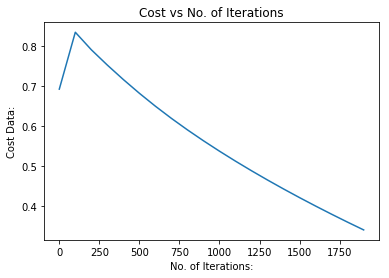

In [22]:
# Plot learning curve (with costs) for part 2
x_axis = [i for i in range(0,2000) if i%100 ==0]
y_axis = [Cost_Data1[i] for i in range(0,2000) if i%100 ==0]
plt.plot(x_axis, y_axis)
plt.xlabel('No. of Iterations:')
plt.ylabel('Cost Data:')
plt.title('Cost vs No. of Iterations')

### 5.3 - Analysis
Compare the cost function plots of part_1 and part_2. Write your observation below.

#### Write Your observation here
......

In [23]:


# ##----------------------------Part 1 --------------------------------------
# Learning Rate: 0.0005
# Number of Epochs: 5000

# train accuracy: 80.78125 %
# test accuracy: 65.0 %
    
# Result: Smooth Cost Function Observed, as the number of iterations increases, the cost is converging towards 
# a minima. 

# ##---------------------------Part 2----------------------------------------
# Learning Rate: 0.005 (10x Increase!)
# Number of Epochs: 2000 (60% Decrease in Epoch Time)

# train accuracy: 91.25 %
# test accuracy: 59.375 %
    
# Result: Cost function shows divergent behavior at first, but slowly settles down towards a minima. 
    
# Summary: As we can observe, a smaller learning rate gives a smoother loss function, with weight updates having lesser
# magnitude, but might take more time to converge. However, if the learning rate is increased over a specific amount, 
# it shows undesirable divergent behavior. Therefore, an optimal learning rate between the two which maximises speed
# and stability is desired. 


#MANOHAR ANUMOLU UID 115733039
# #---------------------------------------------------------------------------